<a href="https://colab.research.google.com/github/ashwinichavan5443/Face_Recognition_Using_DeepLearning/blob/master/FR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install dlib

In [2]:
pip install face_recognition


     |████████████████████████████████| 100.2MB 58kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=ad25bdffef0efa6b95ba4fde06866d07caf56a0ae290c410681a4e509179cf92
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [3]:
pip install imutils

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cp -a /content/drive/'MyDrive'/facerecognition1.zip /content/
%cd /content/facerecognition1/
!unzip facerecognition1.zip

[Errno 2] No such file or directory: '/content/facerecognition1/'
/content
Archive:  facerecognition1.zip
  inflating: facerecognition/3.jpg   
   creating: facerecognition/Ashwini/
  inflating: facerecognition/Ashwini/1.jpg  
  inflating: facerecognition/Ashwini/10.jpg  
  inflating: facerecognition/Ashwini/11.jpg  
  inflating: facerecognition/Ashwini/12.jpg  
  inflating: facerecognition/Ashwini/13.jpg  
  inflating: facerecognition/Ashwini/14.jpg  
  inflating: facerecognition/Ashwini/15.jpg  
  inflating: facerecognition/Ashwini/16.jpg  
  inflating: facerecognition/Ashwini/17.jpg  
  inflating: facerecognition/Ashwini/18.jpg  
  inflating: facerecognition/Ashwini/19.jpg  
  inflating: facerecognition/Ashwini/2.jpg  
  inflating: facerecognition/Ashwini/20.jpg  
  inflating: facerecognition/Ashwini/3.jpg  
  inflating: facerecognition/Ashwini/4.jpg  
  inflating: facerecognition/Ashwini/5.jpg  
  inflating: facerecognition/Ashwini/6.jpg  
  inflating: facerecognition/Ashwini/7.jpg

In [6]:
%cd /content/facerecognition

/content/facerecognition


In [8]:
!python encode_faces.py

[INFO] quantifying faces...
[INFO] processing image 1/401
[INFO] processing image 2/401
[INFO] processing image 3/401
[INFO] processing image 4/401
[INFO] processing image 5/401
[INFO] processing image 6/401
[INFO] processing image 7/401
[INFO] processing image 8/401
[INFO] processing image 9/401
[INFO] processing image 10/401
[INFO] processing image 11/401
[INFO] processing image 12/401
[INFO] processing image 13/401
[INFO] processing image 14/401
[INFO] processing image 15/401
[INFO] processing image 16/401
[INFO] processing image 17/401
[INFO] processing image 18/401
[INFO] processing image 19/401
[INFO] processing image 20/401
[INFO] processing image 21/401
[INFO] processing image 22/401
[INFO] processing image 23/401
[INFO] processing image 24/401
[INFO] processing image 25/401
[INFO] processing image 26/401
[INFO] processing image 27/401
[INFO] processing image 28/401
[INFO] processing image 29/401
[INFO] processing image 30/401
[INFO] processing image 31/401
[INFO] processing im

[INFO] loading encodings...
[INFO] recognizing faces...


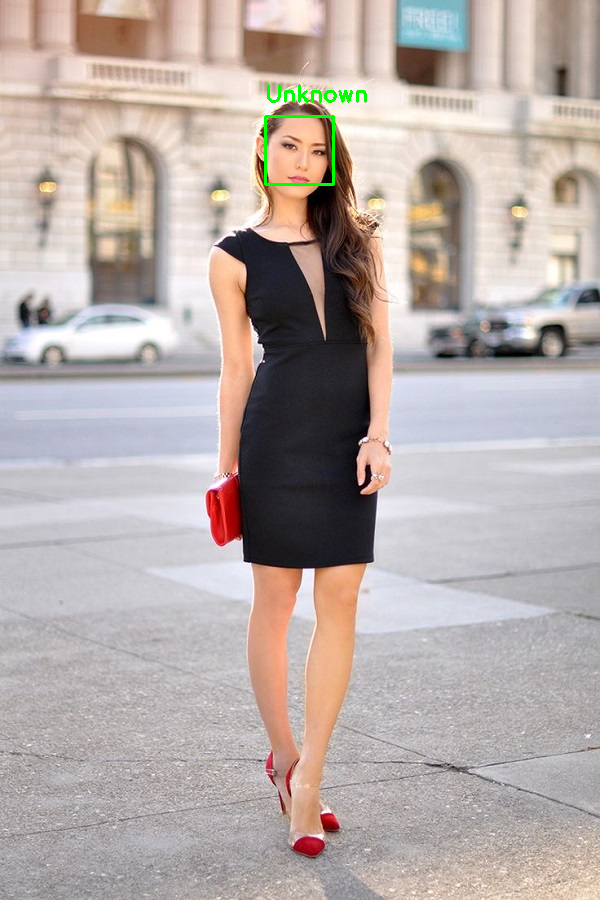

-1

In [12]:
import face_recognition
import argparse
import pickle
import cv2
from google.colab.patches import cv2_imshow
# construct the argument parser and parse the arguments

print("[INFO] loading encodings...")
data = pickle.loads(open("/content/facerecognition/encodings.pickle", "rb").read())
# load the input image and convert it from BGR to RGB
image = cv2.imread("/content/facerecognition/finalg.jpg")
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# detect the (x, y)-coordinates of the bounding boxes corresponding
# to each face in the input image, then compute the facial embeddings
# for each face
print("[INFO] recognizing faces...")
boxes = face_recognition.face_locations(rgb,
	model="cnn")
encodings = face_recognition.face_encodings(rgb, boxes)
# initialize the list of names for each face detected
names = []

# loop over the facial embeddings
for encoding in encodings:
	# attempt to match each face in the input image to our known
	# encodings
	matches = face_recognition.compare_faces(data["encodings"],
		encoding)
	name = "Unknown"

	if True in matches:
		# find the indexes of all matched faces then initialize a
		# dictionary to count the total number of times each face
		# was matched
		matchedIdxs = [i for (i, b) in enumerate(matches) if b]
		counts = {}
		# loop over the matched indexes and maintain a count for
		# each recognized face face
		for i in matchedIdxs:
			name = data["names"][i]
			counts[name] = counts.get(name, 0) + 1
		# determine the recognized face with the largest number of
		# votes (note: in the event of an unlikely tie Python will
		# select first entry in the dictionary)
		name = max(counts, key=counts.get)
	
	# update the list of names
	names.append(name)

for ((top, right, bottom, left), name) in zip(boxes, names):
	# draw the predicted face name on the image
	cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
	y = top - 15 if top - 15 > 15 else top + 15
	cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,0.75, (0, 255, 0), 2)
# show the output image
cv2_imshow(image)
cv2.waitKey(0)

In [ ]:
from imutils.video import VideoStream
import face_recognition
import argparse
import imutils
import pickle
import time
import cv2
from IPython.display import clear_output, Image
import base64
from threading import Thread, Lock

class WebcamVideoStream :
      def arrayShow (imageArray):
          ret, png = cv2.imencode('.png', imageArray)
          encoded = base64.b64encode(png)
          return Image(data=encoded.decode('ascii'))

      def __init__(self, src = 0, width = 320, height = 240) :
              self.stream = cv2.VideoCapture(0)
              self.stream.set(cv2.CAP_PROP_FRAME_WIDTH, 160)
              self.stream.set(cv2.CAP_PROP_FRAME_HEIGHT, 120)
              (self.grabbed, self.frame) = self.stream.read()
              self.started = False
              self.read_lock = Lock()

      def start(self) :
              if self.started :
                  print("already started!!")
                  return None
              self.started = True
              self.thread = Thread(target=self.update, args=())
              self.thread.start()
              return self

      def read(self) :
              self.read_lock.acquire()
              frame = self.frame.copy()
              self.read_lock.release()
              return frame

      def stop(self) :
              self.started = False
              self.thread.join()

      def __exit__(self, exc_type, exc_value, traceback) :
              self.stream.release()

      def update(self) :
              while self.started :
                  (grabbed, frame) = self.stream.read()
                  self.read_lock.acquire()
                  self.grabbed, self.frame = grabbed, frame
                  self.read_lock.release()
def arrayShow (imageArray):
        ret, png = cv2.imencode('.png', imageArray)
        encoded = base64.b64encode(png)
        return Image(data=encoded.decode('ascii'))



#video_capture = cv2.VideoCapture("rtmp://cdn1.cloudvms.in/dvr1/cam3")
print("[INFO] loading encodings...")
data = pickle.loads(open("/content/facerecognition/encodings.pickle", "rb").read())
print("[INFO] recognizing faces...")

vs = WebcamVideoStream().start()                                      
while True :                                                                      
    #count+=1
    frame = vs.read()
    # call our darknet helper on video frame

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    rgb = imutils.resize(frame, width=750)
    r = frame.shape[1] / float(rgb.shape[1])
    boxes = face_recognition.face_locations(rgb,
		model="cnn")
    encodings = face_recognition.face_encodings(rgb, boxes)
    names = []
    
    for encoding in encodings:
        matches = face_recognition.compare_faces(data["encodings"],encoding)
        name = "Unknown"
        if True in matches:
            matchedIdxs = [i for (i, b) in enumerate(matches) if b]
            counts = {}
            for i in matchedIdxs:
                name = data["names"][i]
                counts[name] = counts.get(name, 0) + 1
            name = max(counts, key=counts.get)
        
        names.append(name)
    for ((top, right, bottom, left), name) in zip(boxes, names):
        top = int(top * r)
        right = int(right * r)
        bottom = int(bottom * r)
        left = int(left * r)
        cv2.rectangle(frame, (left, top), (right, bottom),(0, 255, 0), 2)
        y = top - 15 if top - 15 > 15 else top + 15
        cv2.putText(frame, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,0.75, (0, 255, 0), 2)

        


    clear_output(wait=True)
    img = arrayShow(frame)
    #cv2.imwrite(str(count)+".jpg",frame)
    display(img)
    #display(image)
    print(".")
    time.sleep(1)
    #if cv2.waitKey(1) & 0xFF == ord('q'):
    #    break
    #vs.stop()
    #cv2.destroyAllWindows()

